In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [ ]:
# Load the dataset from a URL into a pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
# Display the first 5 rows of the DataFrame
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
# Get the shape of the DataFrame (number of rows and columns)
df.shape

(37249, 2)

In [ ]:
# Get a random sample of a comment from the 'clean_comment' column
df.sample()['clean_comment'].values

array([' would love have the girl the middle sit face '], dtype=object)

In [ ]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
# Check for missing values in the DataFrame
df.isnull().sum()

,0
clean_comment,100
category,0


In [ ]:
# Display rows with missing values in the 'clean_comment' column
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
# Count the number of missing values in each category for the 'clean_comment' column
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [ ]:
# Remove rows with missing values
df.dropna(inplace=True)

In [ ]:
# Check for duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(350)

In [ ]:
# Display the duplicate rows
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Verify that there are no more duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# Find comments that are empty or contain only whitespace
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [ ]:
# Remove comments that are empty or contain only whitespace
df = df[~(df['clean_comment'].str.strip() == '')]

In [ ]:
# Convert the 'clean_comment' column to lowercase
df.loc[:, 'clean_comment'] = df['clean_comment'].str.lower()

# Verify the transformation by displaying the first few rows
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
# Find comments that have leading or trailing whitespace
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df.loc[:, 'clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [ ]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,clean_comment,category


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['category']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'category'}, axis=1)
              .sort_values('category', ascending=True))
  xs = counted['category']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('category', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('category')
_ = plt.ylabel('count()')

In [ ]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [ ]:
# Remove new line characters from the 'clean_comment' column
df.loc[:, 'clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


## EDA(Exploratory Data Analysis)

<Axes: xlabel='category', ylabel='count'>

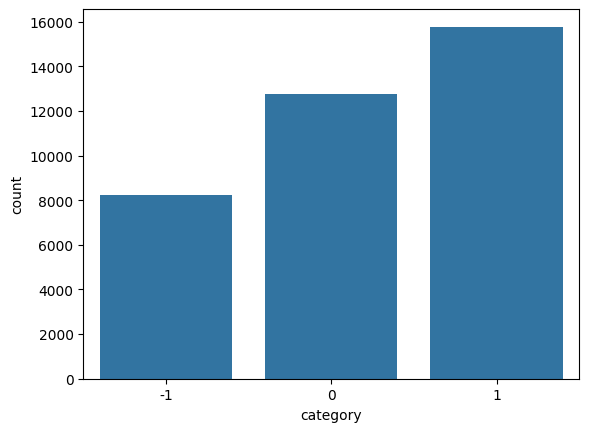

In [ ]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of classes
sns.countplot(data=df,x="category")

In [ ]:
# Calculate the frequency distribution of sentiments
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [ ]:
# Calculate the word count for each comment
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [ ]:
# Display a random sample of 25 rows
df.sample(25)

,clean_comment,category,word_count
37246,downvote karna tha par upvote hogaya,0,6
33764,the great freddy mercury once said “the show m...,1,10
36311,demonetization,0,1
671,the live feed election result news from aam aa...,1,12
11518,videos this thread watch playlist feature play...,-1,76
7168,can relate the don cut nails saturday,0,7
16269,2015 modi miss critcism 2016 2017 modi let cha...,0,10
29495,how reliable the indian express they just publ...,0,56
25008,governor sabke saamne,0,3
4752,maaf kar kam padha likha vyakti hai,0,7


In [ ]:
# Get descriptive statistics for the 'word_count' column
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


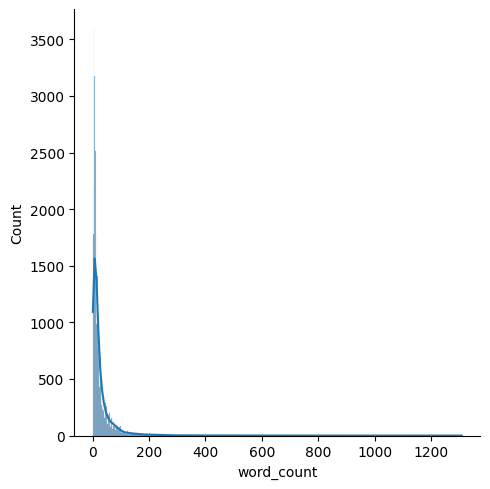

In [ ]:
# Plot the distribution of word count
sns.displot(df['word_count'], kde=True)

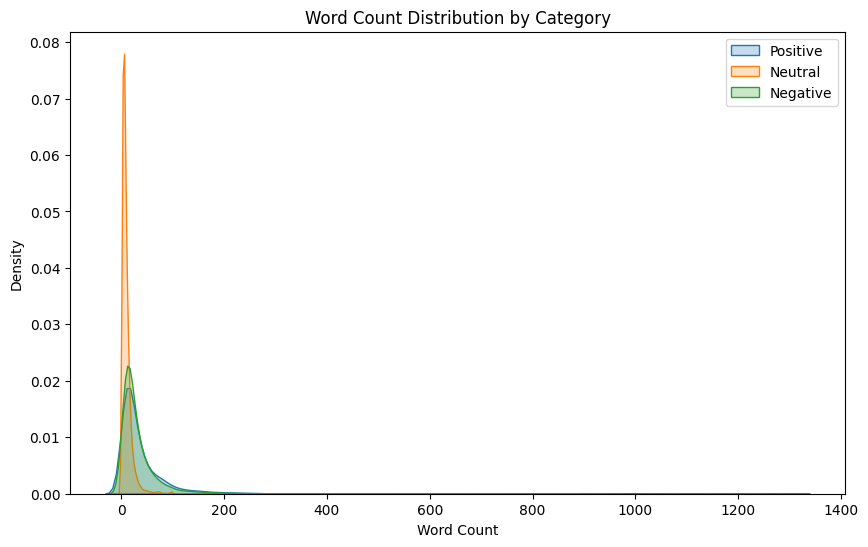

In [ ]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

**Positive comments (category 1)**: These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.<br>
**Neutral comments (category 0)**: The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.<br>
**Negative comments (category -1)**: These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

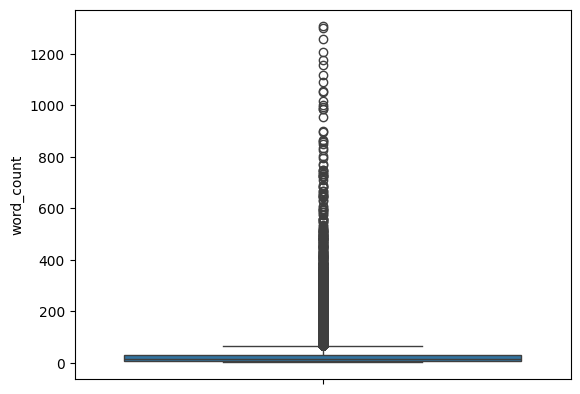

In [ ]:
# Create a boxplot for the 'word_count' column
sns.boxplot(df['word_count'])

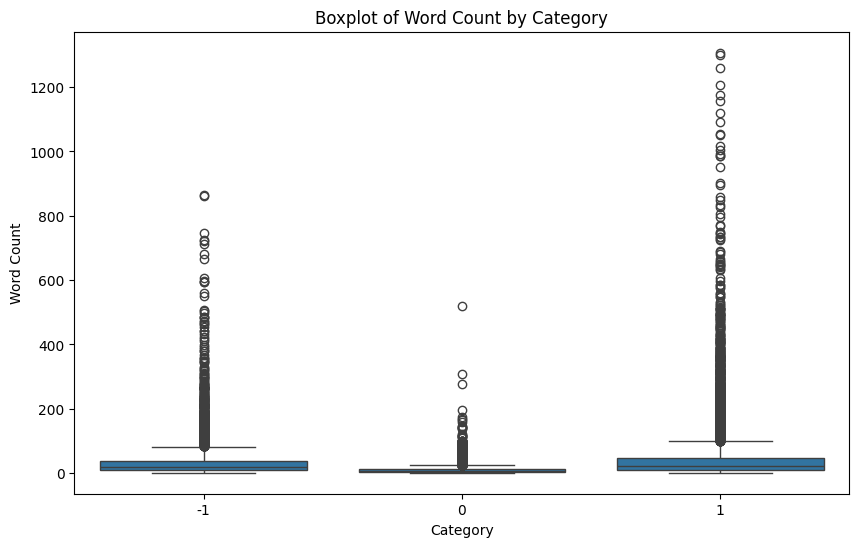

In [ ]:
# Create a boxplot for the 'word_count' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

**Positive comments (category 1)**: The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.<br>
**Neutral comments (category 0)**: The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.<br>
**Negative comments (category -1)**: The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

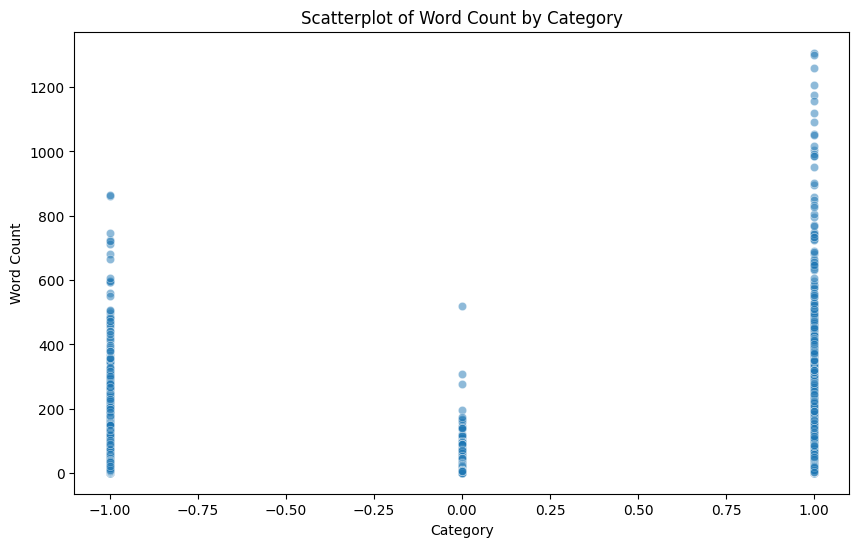

In [ ]:
# Create a scatterplot between 'category' and 'word_count'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

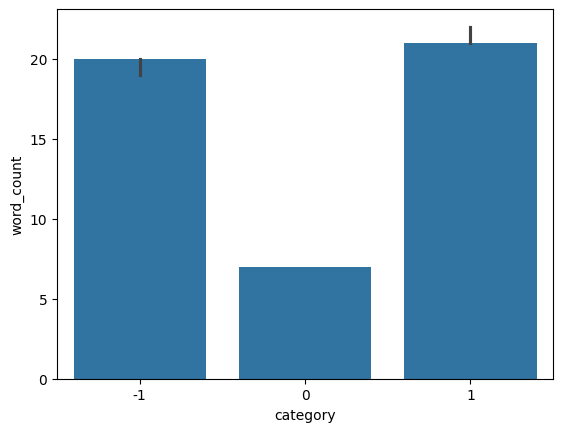

In [ ]:
# Plot the median word counts among sentiments
sns.barplot(df,x='category',y='word_count',estimator='median')

In [ ]:
# Install the NLTK library
!pip install nltk

In [ ]:
# Stop words are common words (e.g., 'the', 'a', 'in') that are often removed
# from text data because they do not carry significant meaning.

# Import the stopwords module from NLTK
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Display a random sample of 5 rows
df.sample(5)

,clean_comment,category,word_count,num_stop_words
33991,not sure has the rights stop movie from being ...,-1,64,25
35293,this common for many government jobs junior en...,1,27,10
22006,siddu won with close margin from badami htm,0,8,3
7472,good work bjp,1,3,0
11269,ayurveda works although not everytime but more...,0,23,9


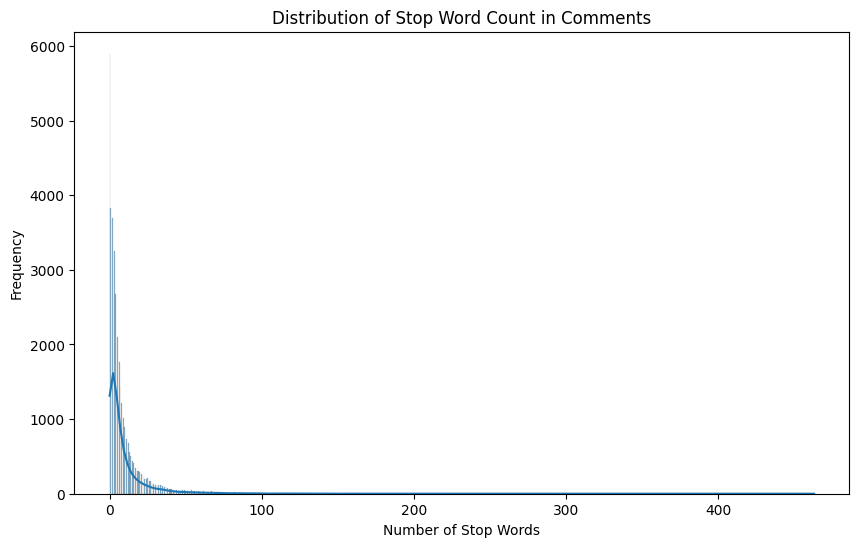

In [ ]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

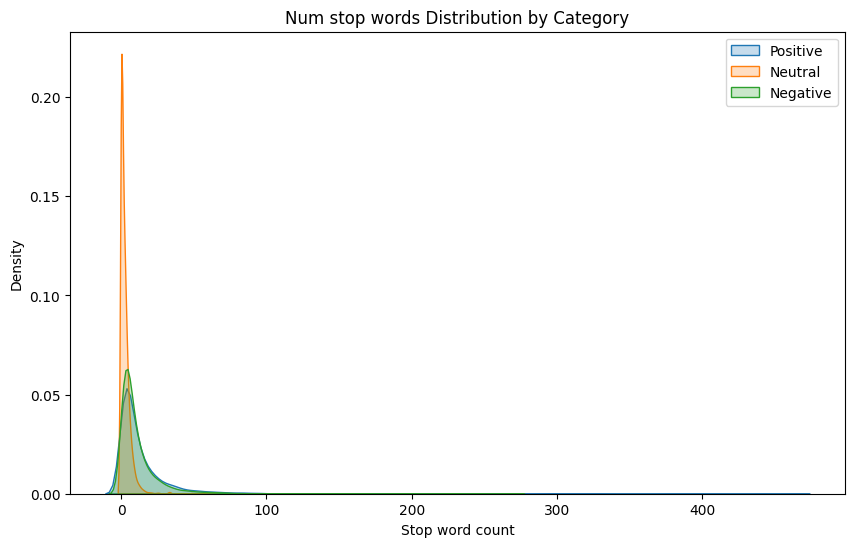

In [ ]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

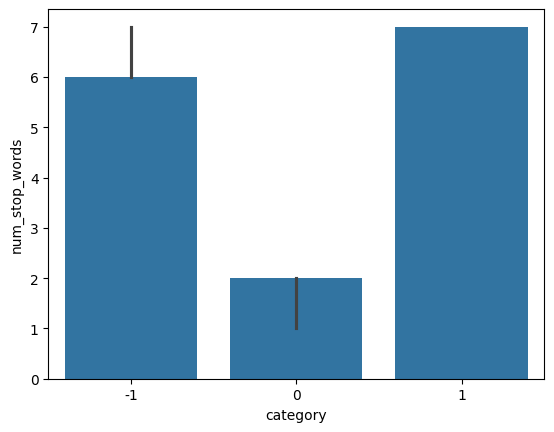

In [ ]:
# Plot the median stop word counts among sentiments
sns.barplot(df,x='category',y='num_stop_words',estimator='median')

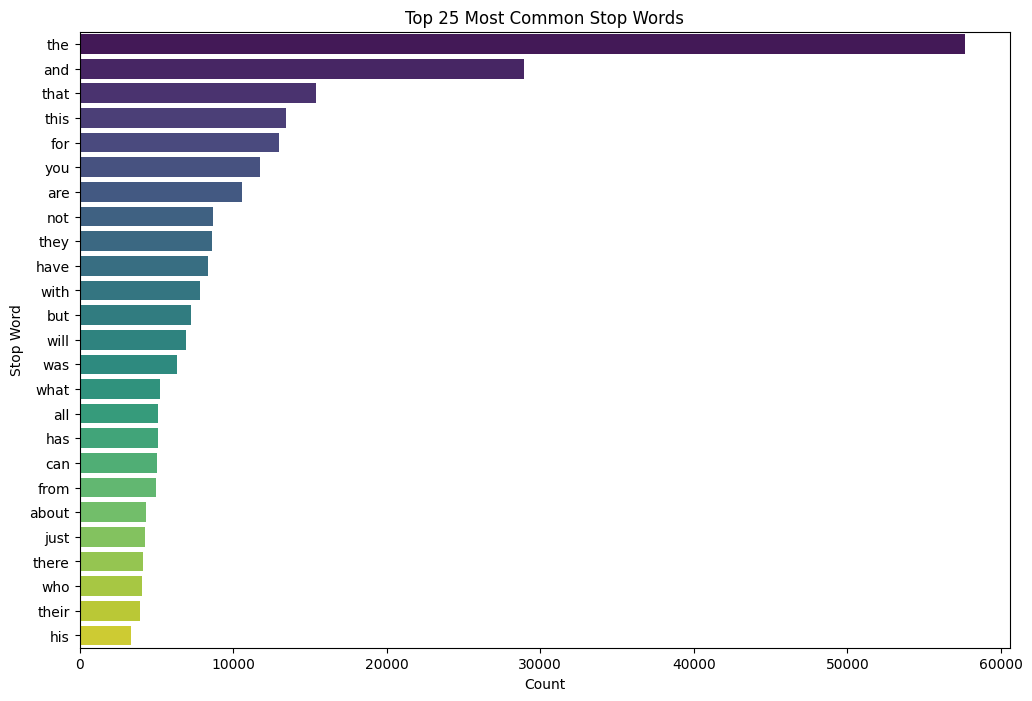

In [ ]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'stop_words'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', hue='stop_word', palette='viridis', legend=False)
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [ ]:
# Calculate the number of characters in each comment
df['num_chars'] = df['clean_comment'].apply(len)

# Display the first 5 rows
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [ ]:
# Get descriptive statistics for the 'num_chars' column
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [ ]:
# Import the Counter class
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [ ]:
# Get the unique characters in the 'character' column
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], dtype=object)

In [ ]:
# Display the 50 least frequent characters
char_frequency_df.tail(50)

,character,frequency
1286,货,1
1287,语,1
1312,耐,1
1313,精,1
342,━,1
345,⊂,1
346,゜,1
347,ｊ,1
1289,显,1
1291,鞋,1


In [ ]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

# Display a random sample of 5 rows
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
11865,what been going with some fed driver,0,7,4,36,0
26005,vivek agnihotri mahachutiya hai,0,4,0,31,0
37126,lol you are spreading everywhere,1,5,2,32,0
6381,take shot this priyanka chopra will get substa...,0,22,3,148,0
26077,laugh people laugh,1,3,0,18,0


In [ ]:
# Get descriptive statistics for the 'num_punctuation_chars' column
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36793.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


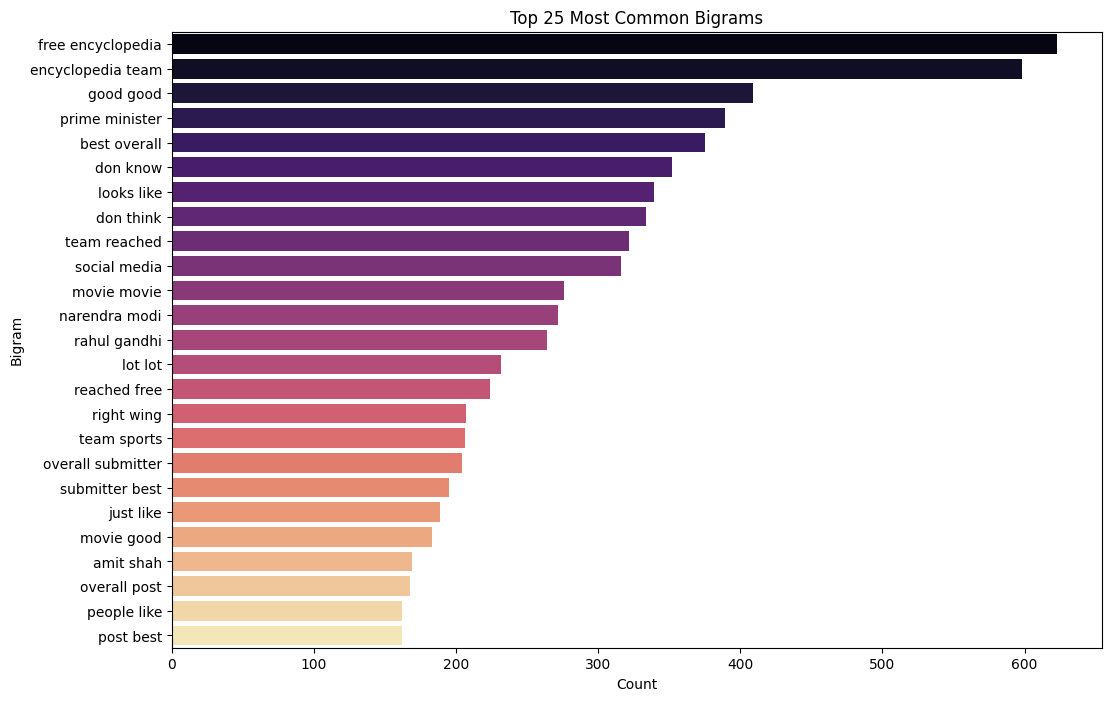

In [ ]:
'''
CountVectorizer is converts a collection of text documents into a matrix of token counts.

      A bigram is a sequence of two adjacent words in a text. The "bi" in "bigram" means two.
      For example, in the sentence:

      "This is a great movie."

      The bigrams are:
                          "this is"
                          "is a"
                          "a great"
                          "great movie"
'''

# Import the CountVectorizer class
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    # Create a CountVectorizer to count bigrams
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    # Transform the corpus into a bag of words
    bag_of_words = vec.transform(corpus)
    # Sum the occurrences of each bigram
    sum_words = bag_of_words.sum(axis=0)
    # Get the frequency of each bigram
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # Sort the bigrams by frequency
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    # Return the top n bigrams
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', hue='bigram', palette='magma', legend=False)
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

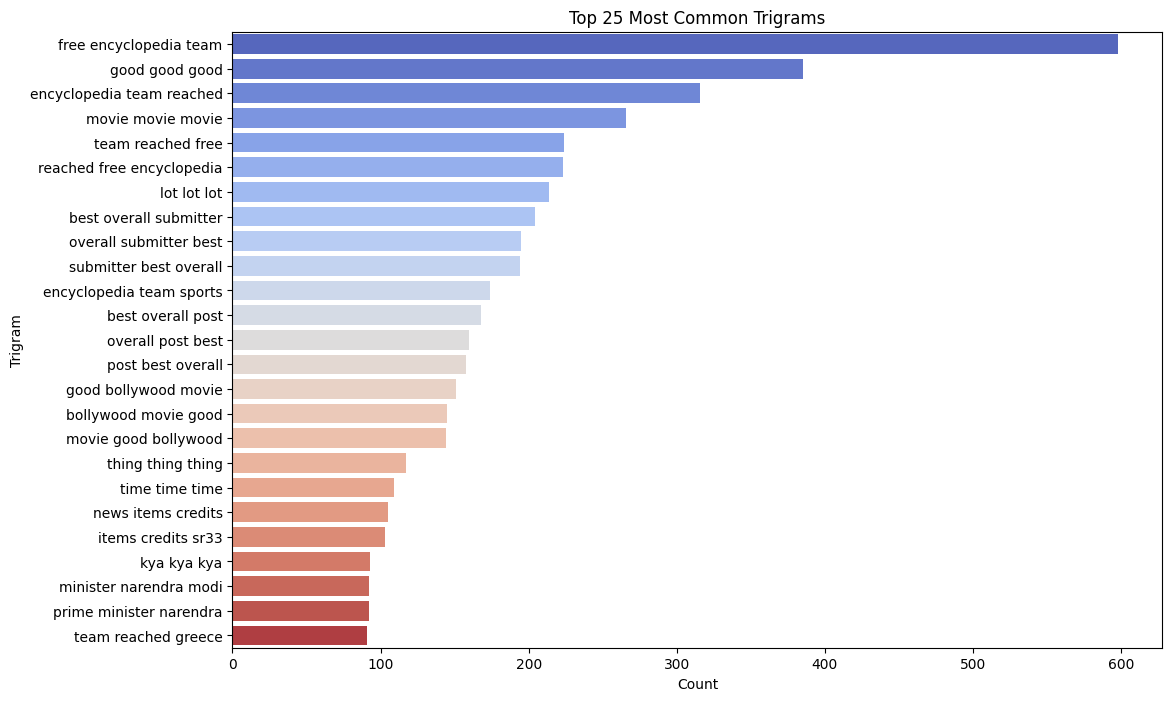

In [ ]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    # Create a CountVectorizer to count trigrams
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    # Transform the corpus into a bag of words
    bag_of_words = vec.transform(corpus)
    # Sum the occurrences of each trigram
    sum_words = bag_of_words.sum(axis=0)
    # Get the frequency of each trigram
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # Sort the trigrams by frequency
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    # Return the top n trigrams
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', hue='trigram', palette='coolwarm', legend=False)
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [ ]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df.loc[:, 'clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [ ]:
# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

# Display the character frequency DataFrame
char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [ ]:
# Display the first 5 rows of the DataFrame
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [ ]:
# Import the stopwords module from NLTK
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df.loc[:, 'clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [ ]:
# Display the first 5 rows of the DataFrame
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [ ]:
# Import the WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
# Download the WordNet corpus
import nltk
nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment' column
df.loc[:, 'clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

# Display the first 5 rows of the DataFrame
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


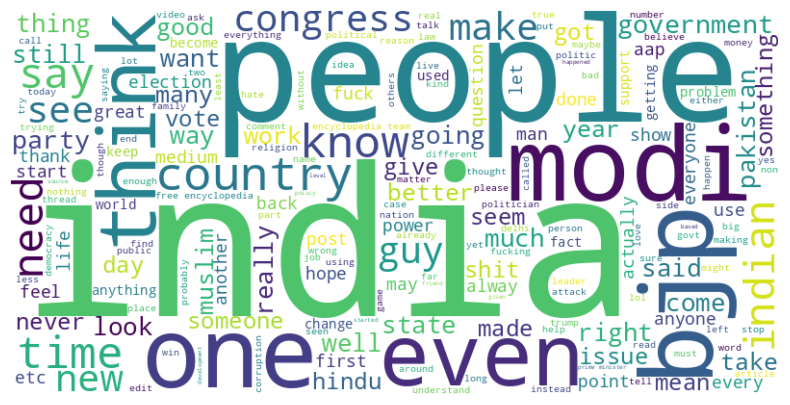

In [ ]:
# Import the WordCloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a function to plot a word cloud
def plot_word_cloud(text):
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Plot a word cloud for all comments
plot_word_cloud(df['clean_comment'])

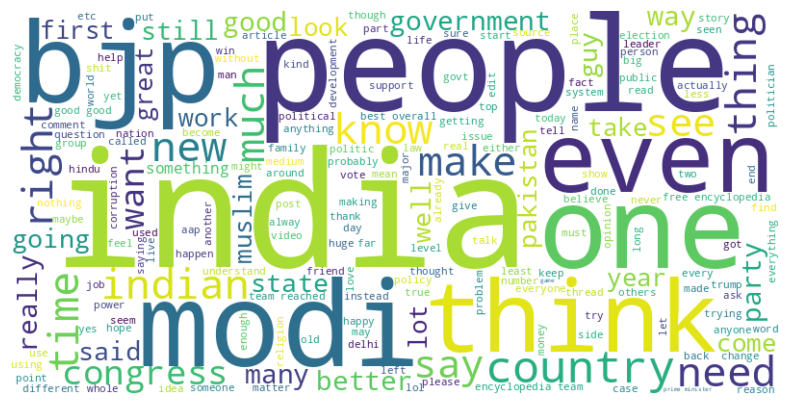

In [ ]:
# Import the WordCloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a function to plot a word cloud
def plot_word_cloud(text):
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Plot a word cloud for positive comments
plot_word_cloud(df[df['category'] == 1]['clean_comment'])

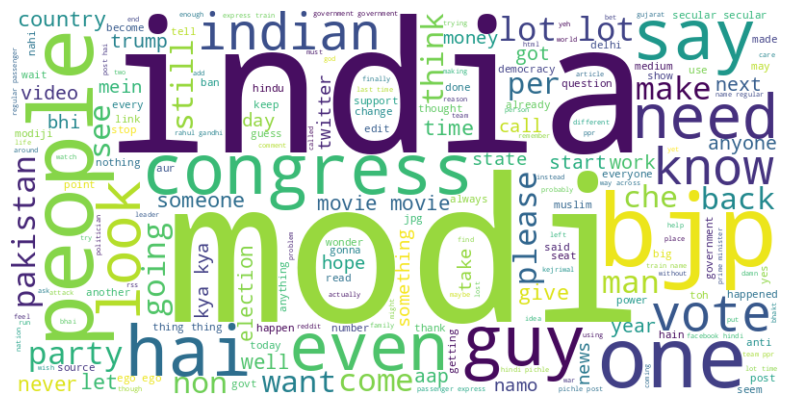

In [ ]:
# Import the WordCloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a function to plot a word cloud
def plot_word_cloud(text):
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Plot a word cloud for neutral comments
plot_word_cloud(df[df['category'] == 0]['clean_comment'])

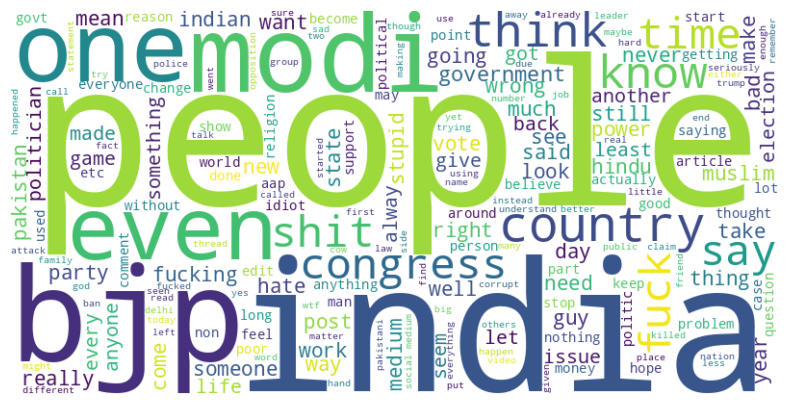

In [ ]:
# Import the WordCloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a function to plot a word cloud
def plot_word_cloud(text):
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Plot a word cloud for negative comments
plot_word_cloud(df[df['category'] == -1]['clean_comment'])

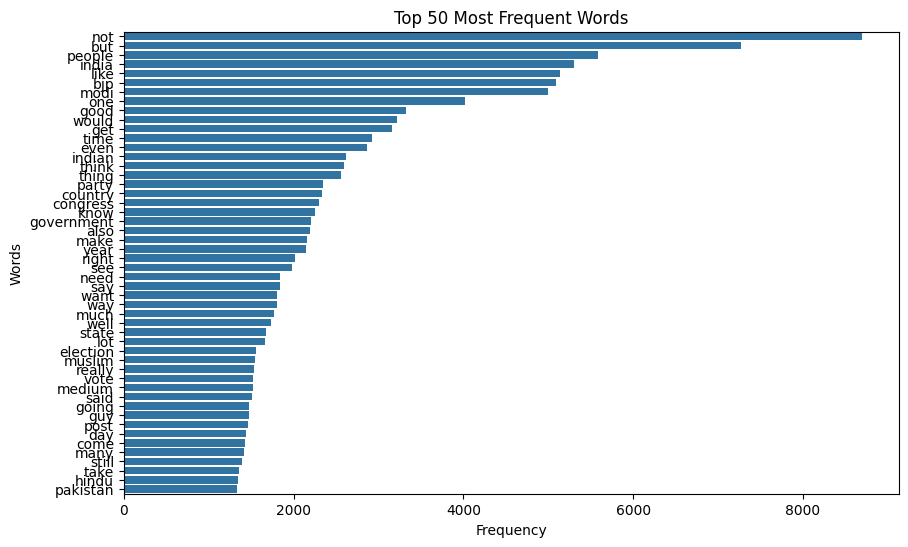

In [ ]:
# Create a function to plot the top N most frequent words
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)

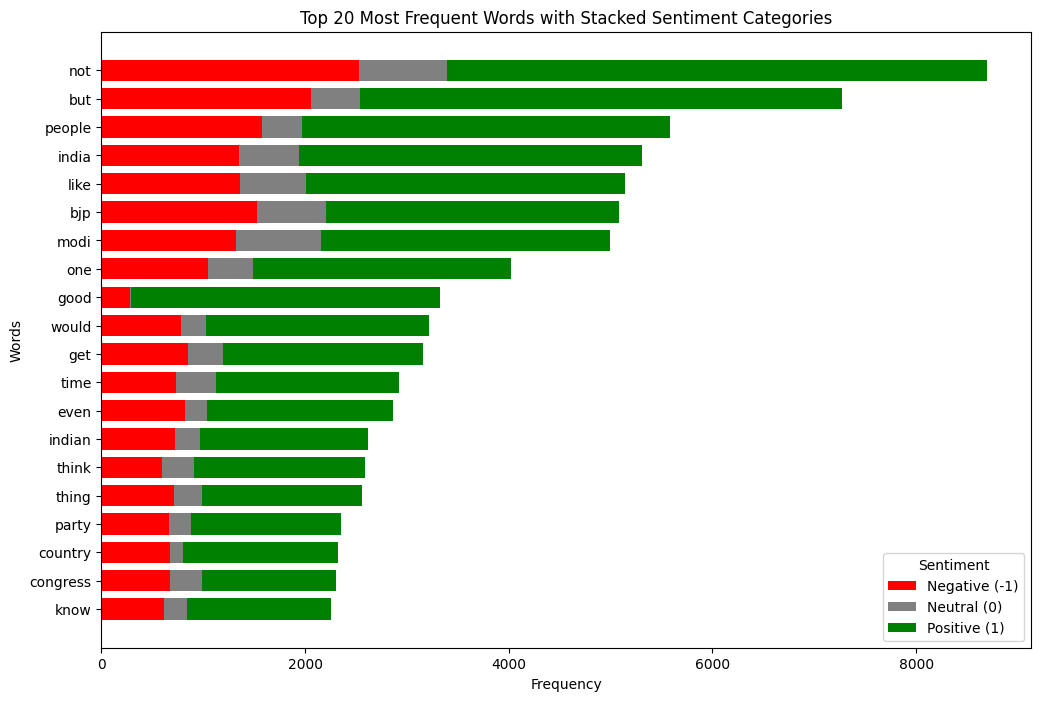

In [ ]:
# Create a function to plot the top N most frequent words by category
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)